# Who's Getting the Cup? Competition

# Cupmon Team<br>
- Hasan Ali Alzayer
- Hotoon yanallah alghamdi
- Fadelah Hamdan Alhajri

----------------------------------

### Imorting Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, classification_report, confusion_matrix, recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Load CSV File and Exploring Data

In [2]:
df = pd.read_csv('worldCup_dataset.csv', sep=",", encoding='utf-8')

In [3]:
df.head(10)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target
0,1311,1930-07-13,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,2
1,1312,1930-07-13,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,True,1
2,1313,1930-07-14,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,True,2
3,1314,1930-07-14,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,2
4,1315,1930-07-15,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,1
5,1316,1930-07-16,Chile,Mexico,3.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,1
6,1317,1930-07-17,Bolivia,Yugoslavia,0.0,4.0,FIFA World Cup,Montevideo,Uruguay,True,2
7,1318,1930-07-17,Paraguay,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,2
8,1320,1930-07-18,Uruguay,Peru,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,False,1
9,1321,1930-07-19,Argentina,Mexico,6.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,1


In [ ]:
df.tail(10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  900 non-null    int64  
 1   date        900 non-null    object 
 2   home_team   900 non-null    object 
 3   away_team   900 non-null    object 
 4   home_score  900 non-null    float64
 5   away_score  900 non-null    float64
 6   tournament  900 non-null    object 
 7   city        900 non-null    object 
 8   country     900 non-null    object 
 9   neutral     900 non-null    bool   
 10  target      900 non-null    int64  
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 71.3+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
target        0
dtype: int64

### Data Preprocessing

#### Figure 1

(array([ True, False]),)

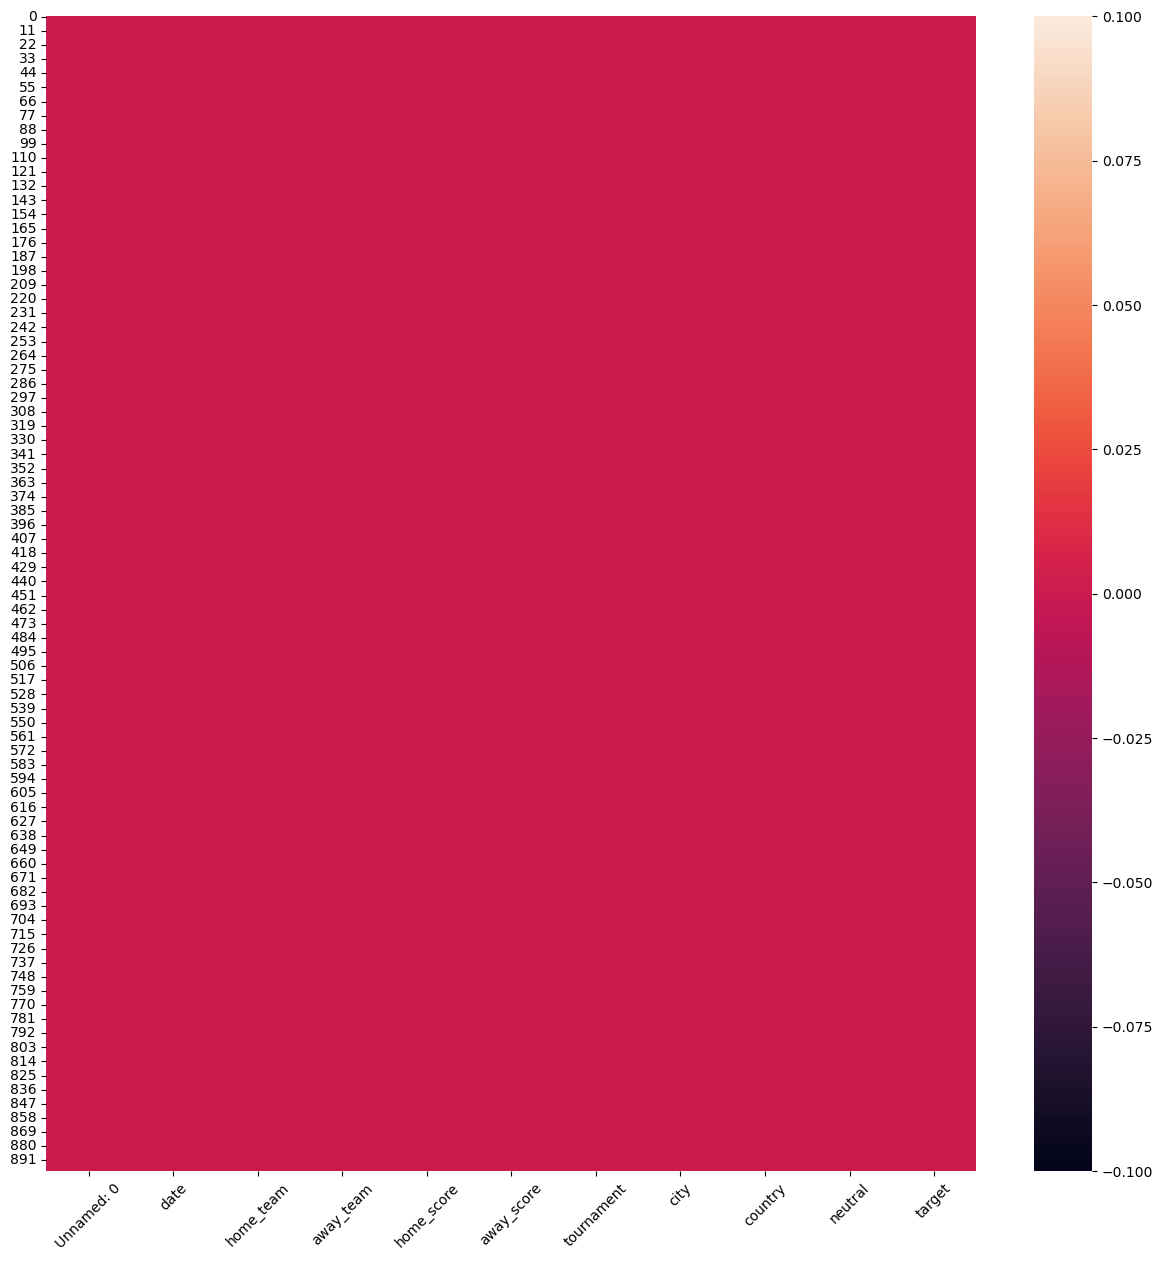

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())
plt.xticks(rotation=45),
df.nunique(),
df['neutral'].unique(),

#### Modfiying Data

In [7]:
df[["year", "month", "day"]] = df["date"].str.split("-", expand = True)
df.drop('date', inplace=True, axis=1)
df.drop('month', inplace=True, axis=1)
df.drop('day', inplace=True, axis=1)
df["neutral"] = df["neutral"].astype(int)

In [8]:
df.head(10)

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target,year
0,1311,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2,1930
1,1312,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,1,1,1930
2,1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,1,2,1930
3,1314,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2,1930
4,1315,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,1,1,1930
5,1316,Chile,Mexico,3.0,0.0,FIFA World Cup,Montevideo,Uruguay,1,1,1930
6,1317,Bolivia,Yugoslavia,0.0,4.0,FIFA World Cup,Montevideo,Uruguay,1,2,1930
7,1318,Paraguay,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2,1930
8,1320,Uruguay,Peru,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,0,1,1930
9,1321,Argentina,Mexico,6.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,1,1930


#### Figure 2

C:\Users\Hassa\AppData\Local\Temp\ipykernel_8584\3927812380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")


<Axes: >

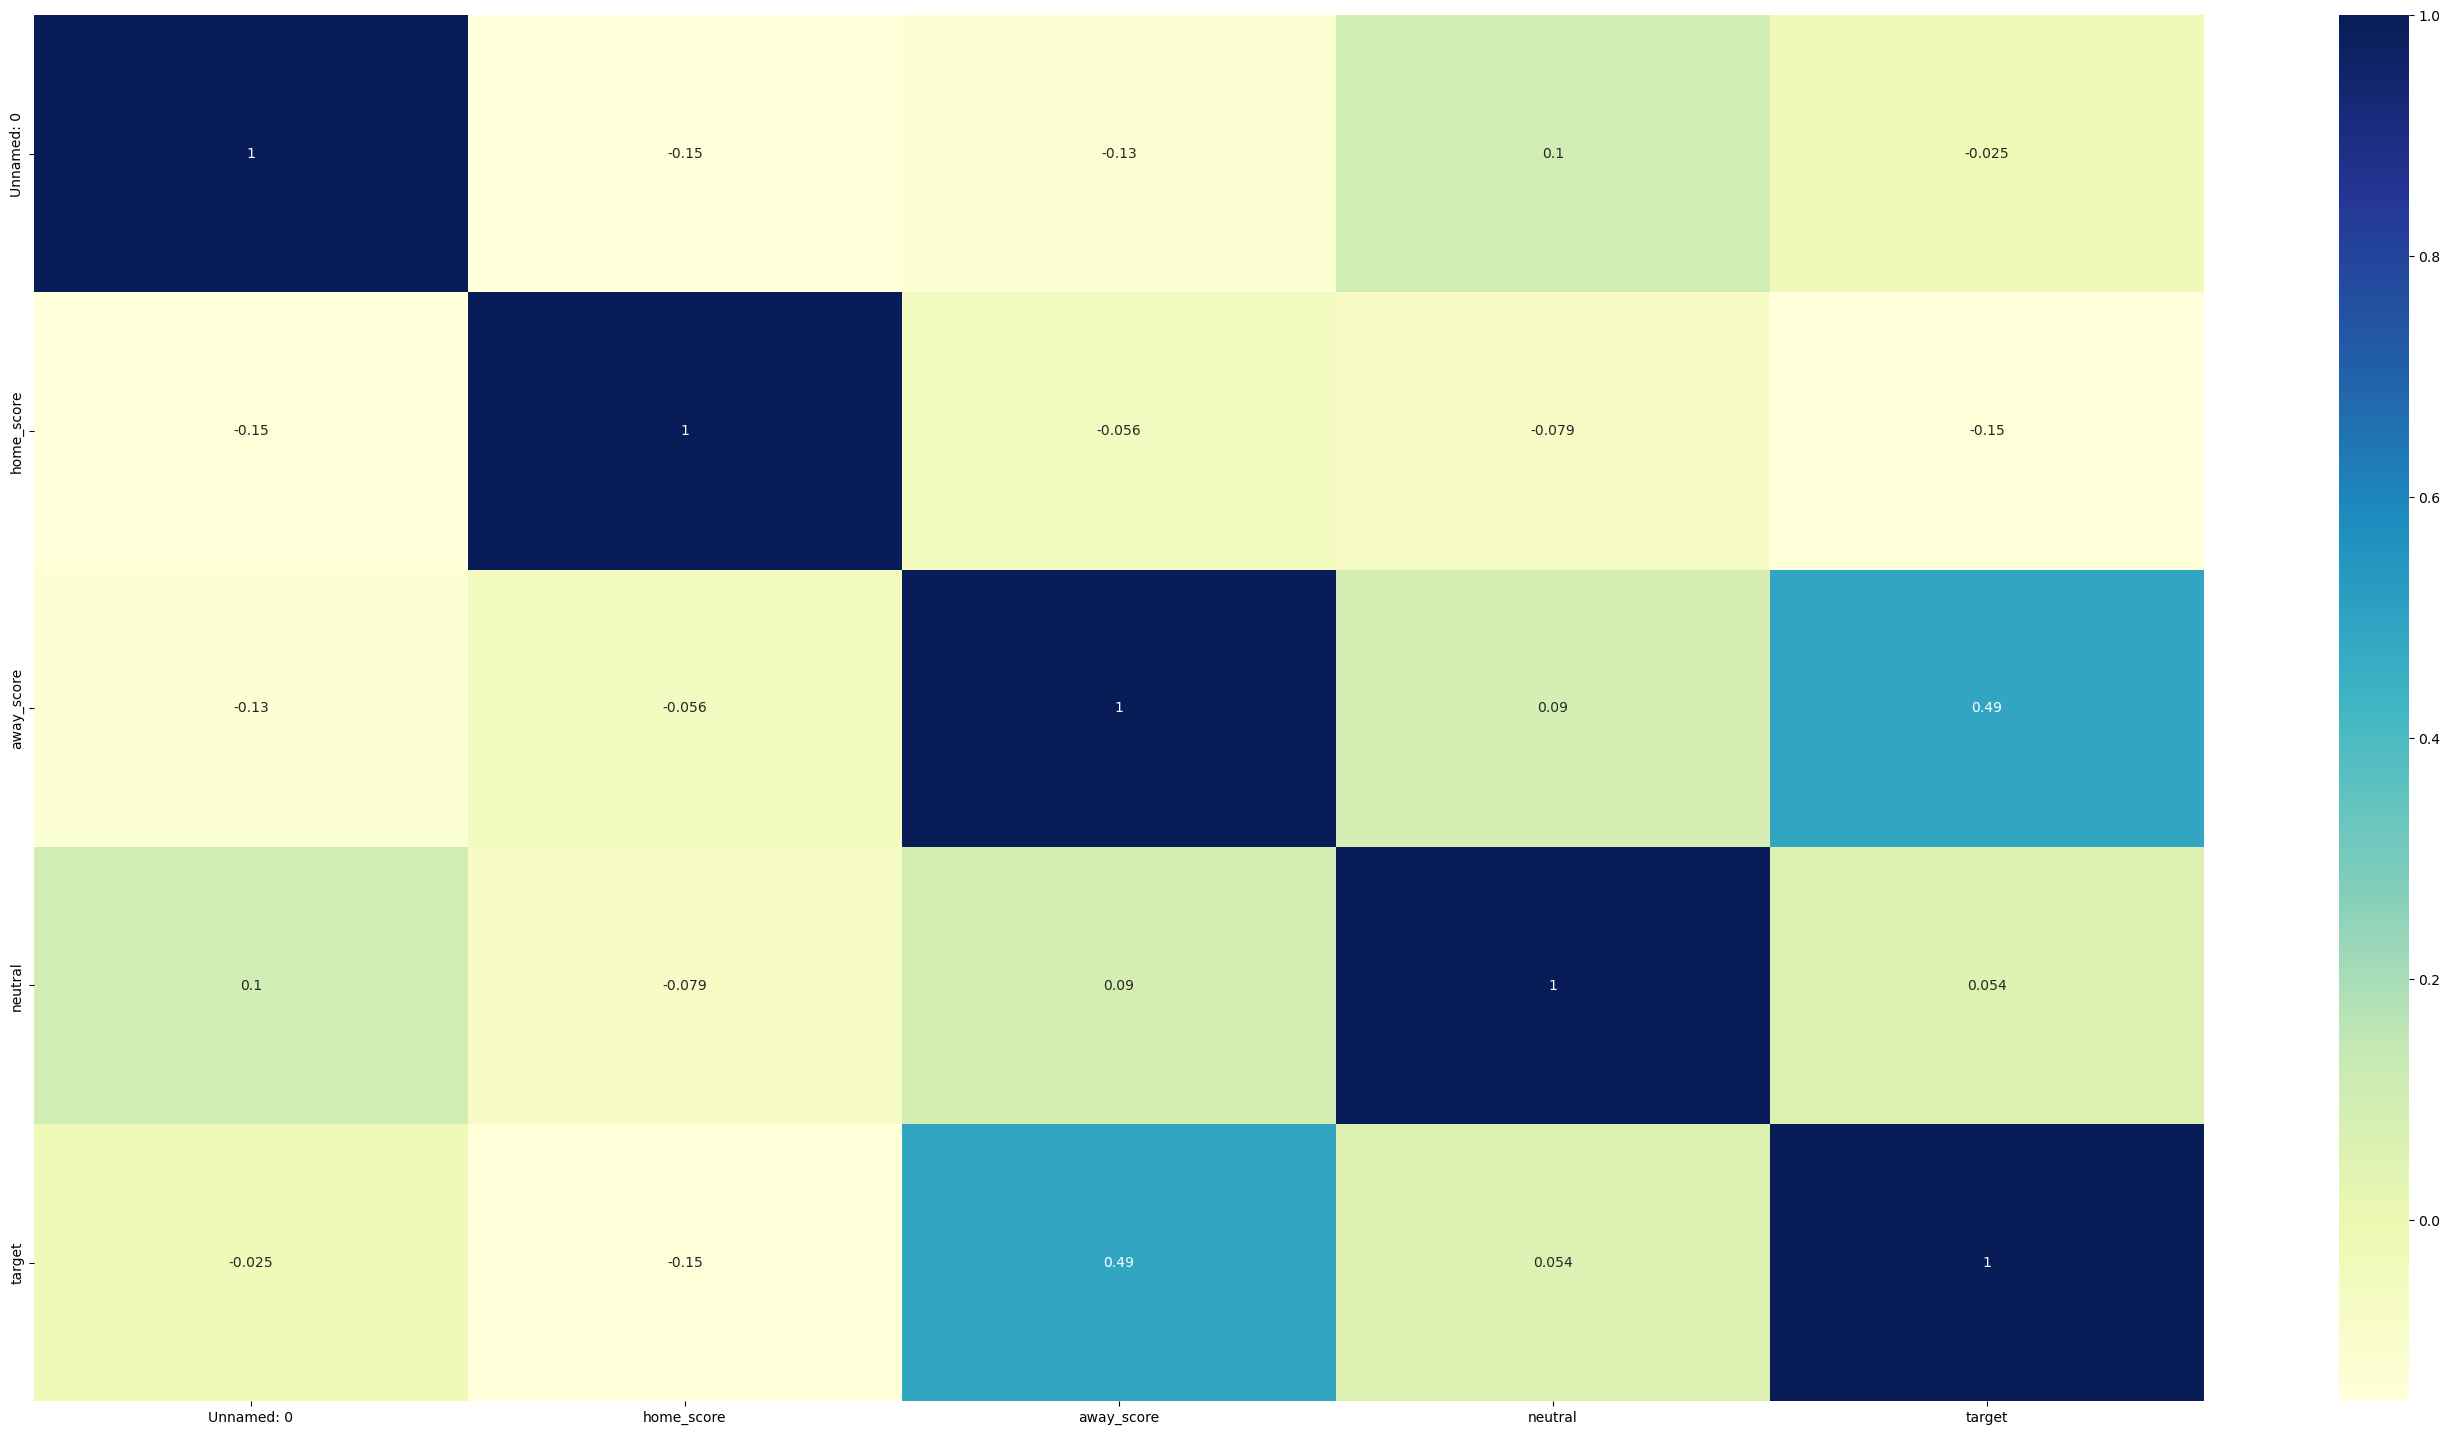

In [9]:
plt.figure(figsize = (35,18))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

#### Labeling the columns

In [10]:
home_team_encoder = preprocessing.LabelEncoder()
df['home_team'] = home_team_encoder.fit_transform(df['home_team'])

In [11]:
away_team_encoder = preprocessing.LabelEncoder()
df['away_team'] = away_team_encoder.fit_transform(df['away_team'])

In [12]:
city_encoder = preprocessing.LabelEncoder()
df['city'] = city_encoder.fit_transform(df['city'])

In [13]:
country_encoder = preprocessing.LabelEncoder()
df['country'] = country_encoder.fit_transform(df['country'])

In [14]:
df.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target,year
0,1311,5,75,0.0,3.0,FIFA World Cup,83,16,1,2,1930
1,1312,26,42,4.0,1.0,FIFA World Cup,83,16,1,1,1930
2,1313,8,78,1.0,2.0,FIFA World Cup,83,16,1,2,1930
3,1314,52,56,1.0,3.0,FIFA World Cup,83,16,1,2,1930
4,1315,2,25,1.0,0.0,FIFA World Cup,83,16,1,1,1930


#### more modifying the data 

In [15]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('tournament', inplace=True, axis=1)

#### save the clean version

In [16]:
df_clean = df.copy()
df_clean.to_csv('fifa world cup clean.csv', encoding='utf-8',  index=False)

#### Figure 3

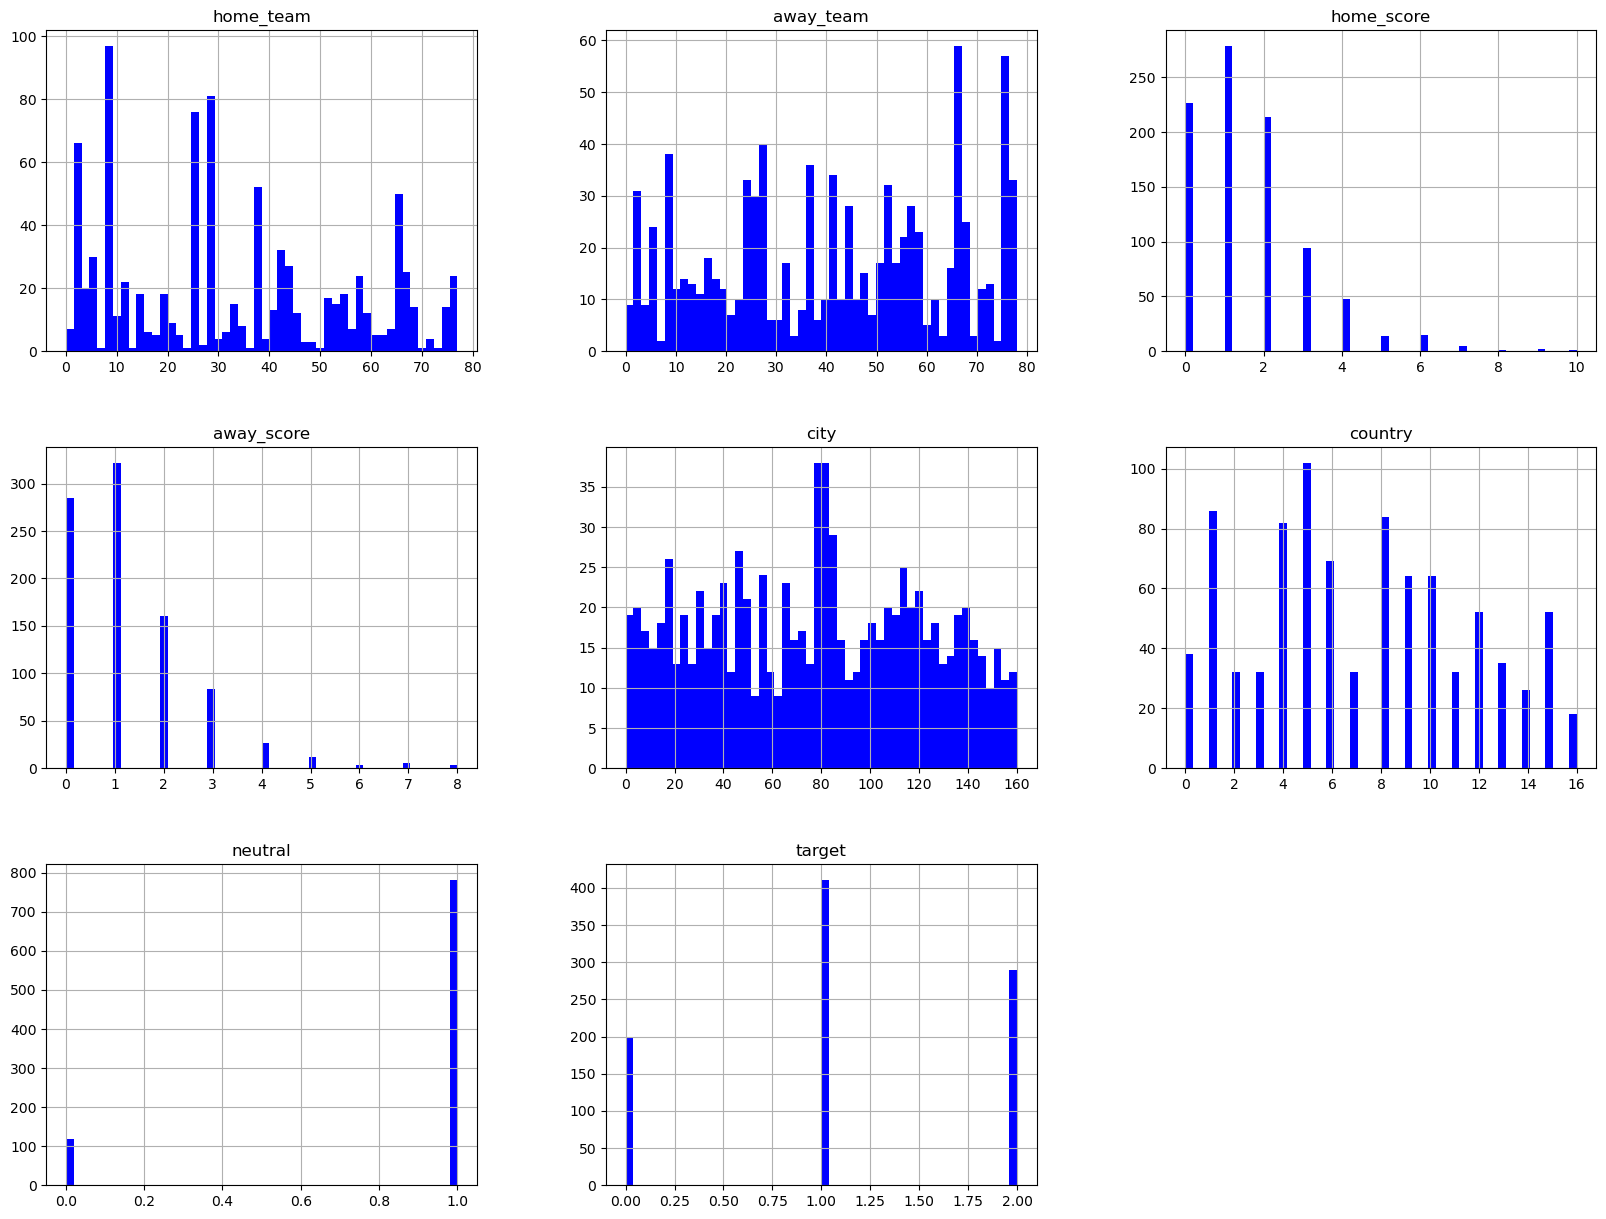

In [17]:
df.hist(bins=50, figsize=(20,15), color='b')
plt.show()

### Split data and target

In [18]:
x = df.drop(['target'],axis=1).values
y = df['target'].values

### Scaling Data

In [19]:
sd_scaler = StandardScaler()
x = sd_scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, shuffle=True, random_state=0)

print("x train shape",x_train.shape)
print("y train shape",y_train.shape)
print("x test shape",x_test.shape)
print("y test shape",x_test.shape)

x train shape (630, 8)
y train shape (630,)
x test shape (270, 8)
y test shape (270, 8)


### Algorithms to test the data

#### Random Forest Model

Accuracy 0.9740740740740741

--------------------------


              precision    recall  f1-score   support

           0       0.98      0.90      0.94        62
           1       0.96      1.00      0.98       131
           2       0.99      0.99      0.99        77

    accuracy                           0.97       270
   macro avg       0.98      0.96      0.97       270
weighted avg       0.97      0.97      0.97       270


--------------------------




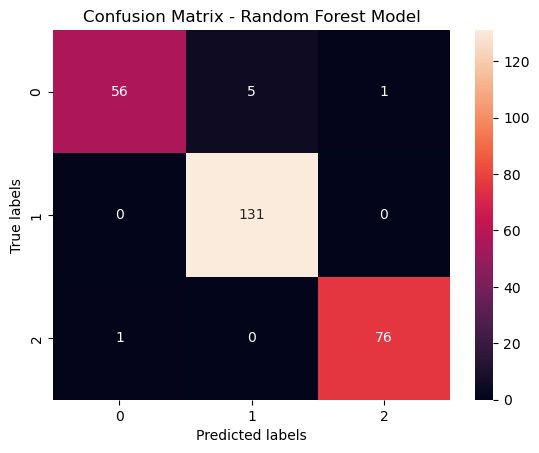

In [20]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=20)
rf.fit(x_train, y_train)
rf.score(x_train,y_train)

y_pred = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("\n--------------------------\n\n")

print(classification_report(y_test,y_pred))
print("\n--------------------------\n\n")

rf = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(rf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Model')
plt.show()

#### Decision Tree

Accuracy 0.9814814814814815

--------------------------


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       1.00      0.99      1.00       131
           2       0.94      1.00      0.97        77

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270


--------------------------




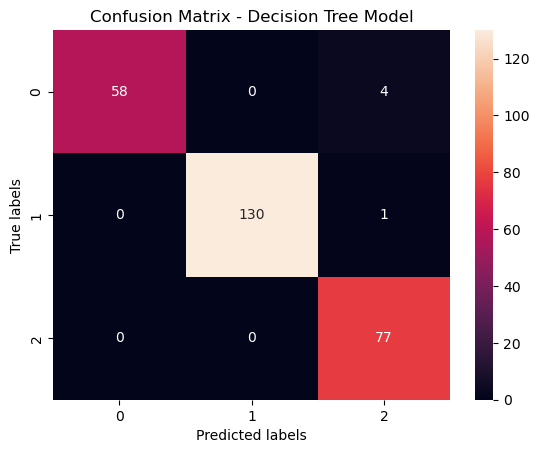

In [21]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(x_train, y_train)
dt_clf.score(x_train,y_train)

y_pred = dt_clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("\n--------------------------\n\n")
print(classification_report(y_test,y_pred))
print("\n--------------------------\n\n")

cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree Model')
plt.show()

#### K-Nearest Neighbors Model AKA KNN

Accuracy 0.7962962962962963

--------------------------


              precision    recall  f1-score   support

           0       0.66      0.44      0.52        62
           1       0.82      0.95      0.88       131
           2       0.83      0.82      0.82        77

    accuracy                           0.80       270
   macro avg       0.77      0.74      0.74       270
weighted avg       0.78      0.80      0.78       270



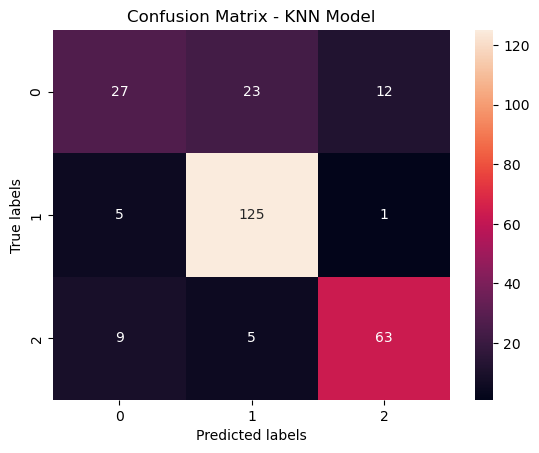

In [22]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(x_train,y_train)
knn.score(x_train,y_train)
knn_pred = knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,knn_pred))
print("\n--------------------------\n\n")
cm = confusion_matrix(y_test,knn_pred)
ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - KNN Model')
print(classification_report(y_test,knn_pred))
plt.show()